#### Code Reference: Python Machine Learning, 3rd Ed. (ISBN-10: 1789955750)

In [1]:
from IPython.display import Image

# Grouping objects by similarity using k-means

## K-means clustering using scikit-learn

평균값이 K개 있는 군집화

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

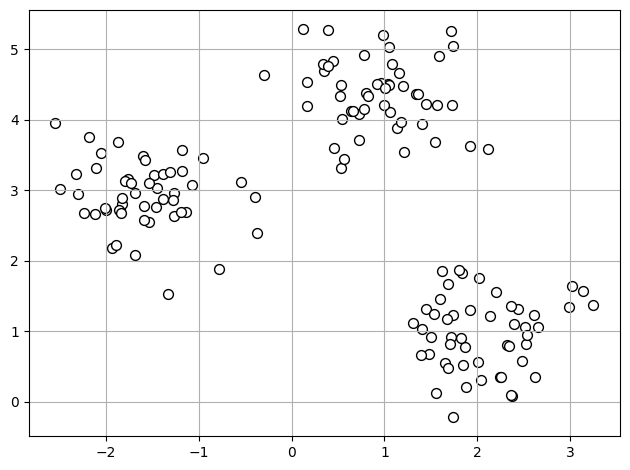

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
# plt.savefig('images/11_01.png', dpi=300)
plt.show()

In [6]:
from sklearn.cluster import KMeans

# TODO: KMeans class를 사용하되, init='random' argument를 사용하세요.
km = KMeans(n_clusters=3,   # 클러스터 3개
            init='random',  # 랜덤하게 클러스터 센터 설정
            n_init=10,      # 랜덤하게 10번
            max_iter=300,   # 업데이트 300번
            tol=1e-04,      # tol값 이상 업데이트 되어야 의미있음
            random_state=0)

y_km = km.fit_predict(X)

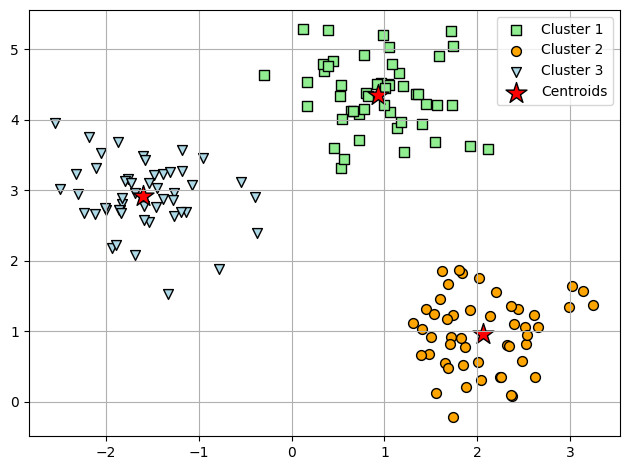

In [7]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
# plt.savefig('images/11_02.png', dpi=300)
plt.show()

Comparison to "bad" clustering:

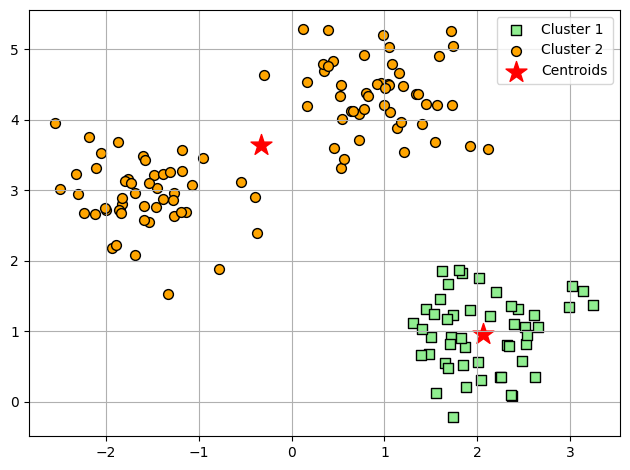

In [10]:
# TODO: KMeans의 class를 2개로 설정해서 잘못된 clustering을 그려보세요.
km = KMeans(n_clusters=2,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')
plt.legend()
plt.grid()
plt.tight_layout()
# plt.savefig('images/11_05.png', dpi=300)
plt.show()

# Locating regions of high density via DBSCAN

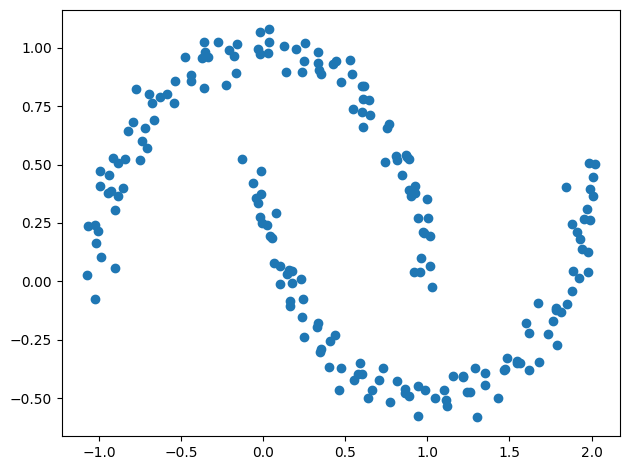

In [11]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
# plt.savefig('images/11_14.png', dpi=300)
plt.show()

K-means and hierarchical clustering:

c:\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


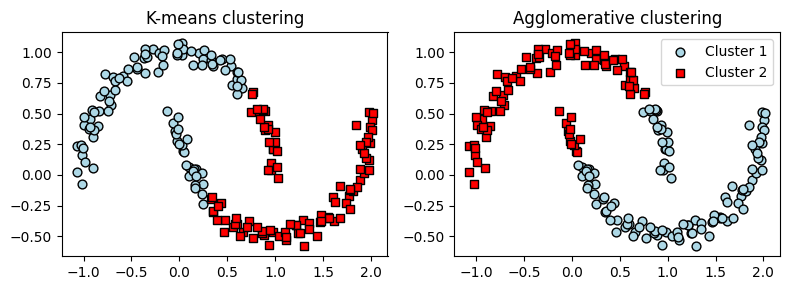

In [15]:
from sklearn.cluster import AgglomerativeClustering

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# TODO: KMeans를 이용해서 위 데이터를 Clustering해 보세요.
km = KMeans(n_clusters=2,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

# TODO: AgglomerativeClustering 함수의 사용법을 검색해 보고, Clustering 해 보세요.
ac = AgglomerativeClustering(n_clusters=2,
                            affinity='euclidean',
                            linkage='complete')

y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='Cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
# plt.savefig('images/11_15.png', dpi=300)
plt.show()


길이 기반으로 하면 어떤 함수로 해도 정확한 결과가 나오지 않음

Density-based clustering:

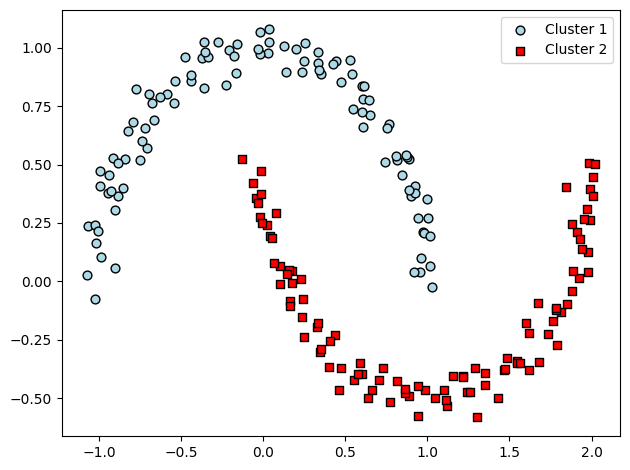

In [16]:
from sklearn.cluster import DBSCAN

# DBSCAN: 밀도 기반의 Clustering 기법

# TODO: DBSCAN의 함수의 사용법을 검색해 보고, Clustering 해 보세요.
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Cluster 2')
plt.legend()
plt.tight_layout()
# plt.savefig('images/11_16.png', dpi=300)
plt.show()

# 과제: 새로운 데이터셋을 이용해 Clustering을 실시해 보세요.

Wine dataset을 이용해 Clustering을 실시해 보세요.
Attribute 2개를 선택해 실시해 보세요.

Clustering이 잘 되었는지 위 그림들 처럼 Plot하여 확인 해 보세요.

- StandardScaler의 사용 여부에 따른 결과를 비교해 보세요.
- 어떤 Attribute가 Wine dataset에 효과적인지 찾아보세요.

In [18]:
# Wine 데이터셋 불러오기
from sklearn import datasets
digit_data = datasets.load_wine()

X_orig = digit_data.data
y = digit_data.target

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [98]:
# 사용하고자 하는 Attribute 2개 선택 (0 ~ 12 중에 2가지를 선택해 보세요)
# (1, 11)
i1 = 2
i2 = 8
X = X_orig[:, [i1, i2]]

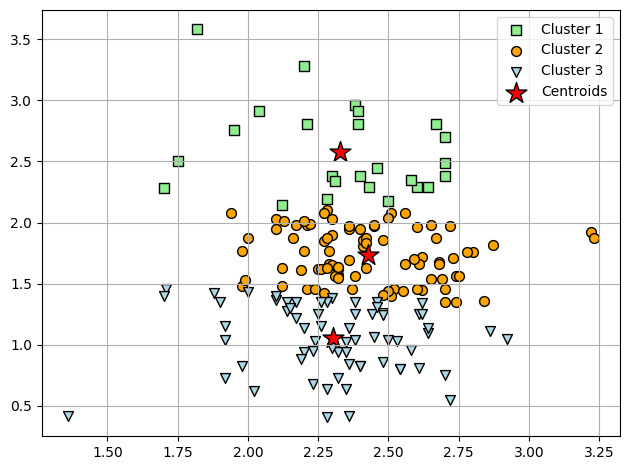

In [99]:
from sklearn.preprocessing import StandardScaler

# StandardScaler의 사용 여부에 따른 결과 비교하기
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
# plt.savefig('images/11_02.png', dpi=300)
plt.show()


In [47]:
X.shape

(178, 2)

In [48]:
y.shape

(178,)

## 추가 과제 : Attribute 3개를 써서 Clustering을 실시해 보세요.
Plot은 동일하게 scatter 를 쓰면 됩니다.

In [49]:
# 3D scatter plot 예시
import numpy as np

xx = np.random.rand(10)
yy = np.random.rand(10)
zz = np.random.rand(10)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(xx, yy, zz, c='lightgreen',
            marker='s', edgecolor='black',
            label='Points')
plt.grid()
plt.tight_layout()
# plt.savefig('images/11_02.png', dpi=300)
plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

In [ ]:
# Wine 데이터셋 불러오기
digit_data = datasets.load_wine()

X_orig = digit_data.data
y = digit_data.target